In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import sys
import os 

sys.path.append('..')
from src import config

if sys.platform == 'linux':
    path = config.LINUX_PATH
else:
    path = config.OS_PATH
os.chdir(path)

In [29]:
data_path = config.STRAVA_TRAIN_PATH
data = pd.read_csv(data_path, index_col=0)
print(data.columns)
data.head()

Index(['name', 'distance', 'moving_time', 'total_elevation_gain',
       'workout_type', 'timezone', 'start_latlng', 'end_latlng',
       'achievement_count', 'kudos_count', 'athlete_count', 'photo_count',
       'manual', 'max_speed', 'average_heartrate', 'max_heartrate', 'pr_count',
       'total_photo_count', 'suffer_score', 'date', 'time',
       'average_speed_mpk'],
      dtype='object')


,name,distance,moving_time,total_elevation_gain,workout_type,timezone,start_latlng,end_latlng,achievement_count,kudos_count,...,manual,max_speed,average_heartrate,max_heartrate,pr_count,total_photo_count,suffer_score,date,time,average_speed_mpk
260,Pre meet,7.1960,28.383333,3.0,3.0,America/Boise,"[43.609586, -116.191655]","[43.609905, -116.191738]",0.0,33.0,...,False,8.6,148.7,173.0,0.0,0.0,16.0,2021-01-29,21:51:05,3.944615
261,WU,4.8448,22.183333,44.0,0.0,America/Boise,"[43.610201, -116.191848]","[43.610297, -116.191757]",0.0,11.0,...,False,4.9,151.0,167.0,0.0,0.0,20.0,2021-01-29,21:08:46,4.578571
262,Gain train 🚂😈🤪,8.1354,36.100000,10.0,0.0,America/Boise,"[43.599624, -116.190932]","[43.599651, -116.192177]",0.0,32.0,...,False,5.3,148.2,164.0,0.0,0.0,26.0,2021-01-29,16:01:32,4.437167
263,"Not 10, sorry Logan",12.9277,59.283333,49.0,0.0,America/Boise,"[43.610229, -116.191785]","[43.610286, -116.191725]",2.0,44.0,...,False,5.5,150.2,165.0,0.0,0.0,52.0,2021-01-28,22:39:54,4.586131
264,😴,6.7834,30.283333,9.0,0.0,America/Boise,"[43.599342, -116.190412]","[43.599663, -116.190929]",0.0,27.0,...,False,7.6,153.4,165.0,0.0,0.0,29.0,2021-01-28,14:13:57,4.464506


In [30]:
from pycaret.regression import *

data_path = config.STRAVA_TRAIN_PATH
data = pd.read_csv(data_path, index_col=0)
data = data.drop(['name','start_latlng', 'end_latlng', "map.summary_polyline"], axis=1)
reg = setup(data, target='kudos_count')
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,6.8324,97.5972,9.7754,0.8278,0.4139,0.3485,0.0590
lr,Linear Regression,7.7367,108.5693,10.3302,0.8079,0.4763,0.4231,0.1810
gbr,Gradient Boosting Regressor,7.0621,109.0344,10.3743,0.8073,0.4160,0.3606,0.0230
ridge,Ridge Regression,7.6984,110.6331,10.4253,0.8065,0.4660,0.4293,0.0040
br,Bayesian Ridge,7.7259,112.1697,10.4974,0.8048,0.4663,0.4296,0.0070
rf,Random Forest Regressor,7.0722,111.0762,10.4963,0.8047,0.4200,0.3683,0.0690
omp,Orthogonal Matching Pursuit,8.1074,119.1245,10.8454,0.7929,0.4740,0.4434,0.0040
ada,AdaBoost Regressor,9.5685,147.1934,12.0686,0.7422,0.5537,0.6088,0.0210
lightgbm,Light Gradient Boosting Machine,8.1195,163.4911,12.6436,0.7207,0.4369,0.3737,0.0110
huber,Huber Regressor,8.7061,200.4709,13.6083,0.6884,0.4897,0.4444,0.0100


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7456, verbose=0, warm_start=False)

In [31]:
model = create_model('et')
tuned_model = tune_model(model)
model_final = finalize_model(tuned_model)
save_model(model_final, 'models/kudos_initial')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.4298,132.5880,11.5147,0.7346,0.3821,0.3813
1,7.0970,111.2805,10.5490,0.8206,0.4745,0.9399
2,8.5897,180.2814,13.4269,0.7413,0.3278,0.2413
3,7.3566,81.7986,9.0443,0.8668,0.4434,0.2473
4,7.5029,105.2122,10.2573,0.7601,0.3037,0.2805
5,6.5177,94.4778,9.7200,0.8072,0.4598,0.6634
6,6.3819,64.8435,8.0525,0.9009,0.4900,0.3102
7,7.1802,112.1307,10.5892,0.7952,0.5453,0.1933
8,5.5755,73.9489,8.5994,0.8346,0.5661,0.1904
9,7.7404,202.7021,14.2373,0.8017,0.2536,0.2284


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='kudos_count', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=6,
                                      max_features=1.0, max_leaf_nodes=None,
                                      max_samples=None,
                                      min_i

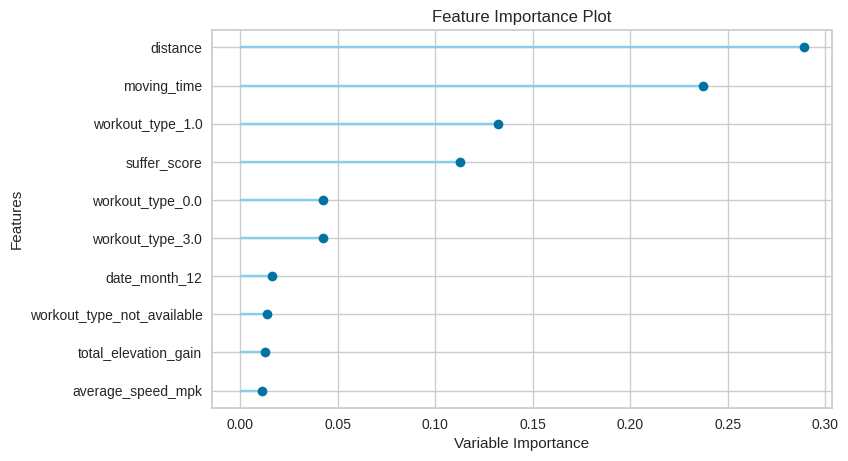

In [32]:
plot_model(tuned_model)
interpret_model(tuned_model)
plot_model(tuned_model, plot='feature')

In [33]:
data_path = config.STRAVA_TEST_PATH
data_unseen = pd.read_csv(data_path, index_col=0)
predictions = predict_model(tuned_model, data=data_unseen)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions.kudos_count.values, predictions.Label.values)
rmse = mean_squared_error(predictions.kudos_count.values, predictions.Label.values, squared=False)
print(f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}')

MSE: 147.19
RMSE: 12.13
